In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jangedoo/utkface-new")

print("Path to dataset files:", path)

In [13]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_dir = 'dataset path '  # Path to dataset
image_size = (64, 64)  

data = []
labels = []

for filename in os.listdir(data_dir):
    try:
        parts = filename.split('_')
        gender = int(parts[1])
        img_path = os.path.join(data_dir, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, image_size)
        data.append(img)
        labels.append(gender)
    except:
        continue

X = np.array(data) / 255.0  # Normalize
y = np.array(labels)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\Randhir kumar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.7260 - loss: 0.5430 - val_accuracy: 0.8650 - val_loss: 0.3111
Epoch 2/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8740 - loss: 0.2985 - val_accuracy: 0.8817 - val_loss: 0.2752
Epoch 3/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8929 - loss: 0.2610 - val_accuracy: 0.8868 - val_loss: 0.2614
Epoch 4/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9013 - loss: 0.2325 - val_accuracy: 0.8804 - val_loss: 0.2759
Epoch 5/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9096 - loss: 0.2182 - val_accuracy: 0.8960 - val_loss: 0.2450
Epoch 6/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9170 - loss: 0.2016 - val_accuracy: 0.8946 - val_loss: 0.2491
Epoch 7/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9280 - loss: 0.1803 - val_accuracy: 0.9005 - val_loss: 0.2515
Epoch 8/10
593/593 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9364 - loss: 0.1635 - 

In [21]:
model.evaluate(X_test, y_test)


149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8960 - loss: 0.2818 


[0.2597827613353729, 0.9027836322784424]

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Predict on test set
y_pred_prob = model.predict(X_test)  # get probabilities
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # convert to binary output (0 or 1)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.4f}")

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Male", "Female"]))

# Confusion matrix
print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step  

✅ Model Accuracy: 0.9028

📊 Classification Report:
              precision    recall  f1-score   support

        Male       0.90      0.92      0.91      2485
      Female       0.91      0.89      0.90      2257

    accuracy                           0.90      4742
   macro avg       0.90      0.90      0.90      4742
weighted avg       0.90      0.90      0.90      4742


🧮 Confusion Matrix:
[[2276  209]
 [ 252 2005]]


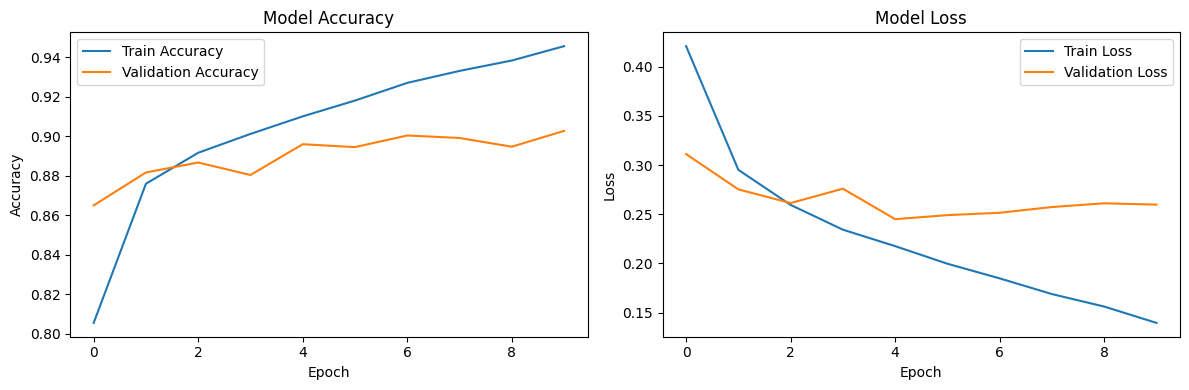

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step 


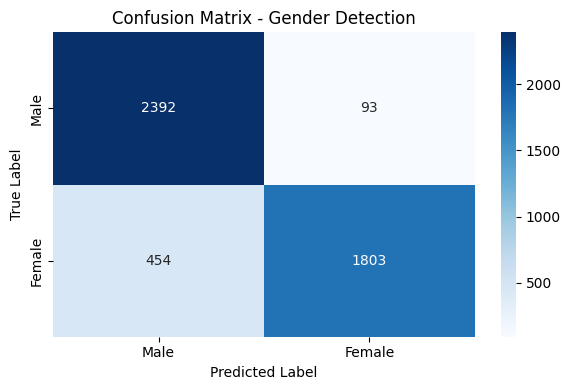


📊 Classification Report:
              precision    recall  f1-score   support

        Male       0.84      0.96      0.90      2485
      Female       0.95      0.80      0.87      2257

    accuracy                           0.88      4742
   macro avg       0.90      0.88      0.88      4742
weighted avg       0.89      0.88      0.88      4742



In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Male", "Female"]

# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gender Detection')
plt.tight_layout()
plt.show()

# Optionally also print the classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=labels))


In [24]:
model.save('gender_model_utkface.keras')  

In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import os

# Load the trained gender model
model_path = "gender_model_utkface.keras"
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at: {model_path}")

model = load_model(model_path)

# Load Haar cascade for face detection
cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
if not os.path.exists(cascade_path):
    raise FileNotFoundError("Haar cascade file not found")

face_cascade = cv2.CascadeClassifier(cascade_path)

# Start webcam capture
cap = cv2.VideoCapture(0)  # 0 = default camera

if not cap.isOpened():
    raise IOError("Cannot access the webcam")

print("[INFO] Starting webcam... Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        print("[ERROR] Failed to read frame from webcam.")
        break

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(30, 30))
    print(f"[DEBUG] Detected faces: {len(faces)}")

    for (x, y, w, h) in faces:
        print("[DEBUG] Processing detected face...")
        # Extract face ROI
        face = frame[y:y+h, x:x+w]

        try:
            # Resize to model input shape
            face_resized = cv2.resize(face, (64, 64)) / 255.0
            face_reshaped = np.reshape(face_resized, (1, 64, 64, 3))

            # Predict gender
            prediction = model.predict(face_reshaped)
            gender = "Female" if prediction[0][0] > 0.5 else "Male"

            # Choose color for gender
            color = (255, 0, 255) if gender == "Female" else (255, 255, 0)

            # Draw rectangle and label
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv2.putText(frame, gender, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
        except Exception as e:
            print(f"[ERROR] Failed to process face: {e}")

    # Display the result
    cv2.imshow("Gender Detection", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("[INFO] Quitting...")
        break

# Cleanup
cap.release()
cv2.destroyAllWindows()


[INFO] Starting webcam... Press 'q' to quit.
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected faces: 0
[DEBUG] Detected fa